In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de los datasets
df_2016 = pd.read_csv("../datasets/OSMI_Mental_Health_in_Tech_Survey_2016.csv")
df_2017 = pd.read_csv("../datasets/OSMI_Mental_Health_in_Tech_Survey_2017.csv")
df_2018 = pd.read_csv("../datasets/OSMI_Mental_Health_in_Tech_Survey_2018.csv")
df_2019 = pd.read_csv("../datasets/OSMI_Mental_Health_in_Tech_Survey_2019.csv")
df_2020 = pd.read_csv("../datasets/OSMI_Mental_Health_in_Tech_Survey_2020.csv")

## Exploración de los datasets

In [5]:
print(f'Dataset 2016 - {df_2016.shape}')
print(f'Dataset 2017 - {df_2017.shape}')
print(f'Dataset 2018 - {df_2018.shape}')
print(f'Dataset 2019 - {df_2019.shape}')
print(f'Dataset 2020 - {df_2020.shape}')

Dataset 2016 - (1433, 63)
Dataset 2017 - (756, 123)
Dataset 2018 - (417, 123)
Dataset 2019 - (352, 82)
Dataset 2020 - (180, 120)


In [8]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [15]:
df_2017.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 123 columns):
 #    Column                                                                                                                                                                                                                                   Non-Null Count  Dtype  
---   ------                                                                                                                                                                                                                                   --------------  -----  
 0    #                                                                                                                                                                                                                                        756 non-null    object 
 1    <strong>Are you self-employed?</strong>                                                            

In [16]:
df_2018.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 123 columns):
 #    Column                                                                                                                                                                                                                                    Non-Null Count  Dtype  
---   ------                                                                                                                                                                                                                                    --------------  -----  
 0    #                                                                                                                                                                                                                                         417 non-null    object 
 1    <strong>Are you self-employed?</strong>                                                         

In [12]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 82 columns):
 #   Column                                                                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                            --------------  -----  
 0   *Are you self-employed?*                                                                                                                                                                                                          352 non-null    bool   
 1   How many employees does your company or organization have?                                                                   

In [17]:
df_2020.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 120 columns):
 #    Column                                                                                                                                                                                                                            Non-Null Count  Dtype  
---   ------                                                                                                                                                                                                                            --------------  -----  
 0    #                                                                                                                                                                                                                                 180 non-null    object 
 1    *Are you self-employed?*                                                                                                

In [26]:
# Me doy cuenta que hay columnas que contienen etiquestas: <strong> y números ".1" o ".2"
# Intento limpiar el nombre de las columnas

def limpiar_nombres(df):    
    # Buscamos columnas que terminen en punto y números
    cols_duplicadas = df.columns[df.columns.str.contains(r'\.\d+$', regex=True)]
    
    # Si existen, las borramos del DataFrame directamente (inplace)
    if len(cols_duplicadas) > 0:
        df.drop(columns=cols_duplicadas, inplace=True)
    
    # Eliminar etiquetas HTML
    df.columns = df.columns.str.replace(r'<.*?>', '', regex=True)

    # 3. Eliminar asteriscos (*)
    df.columns = df.columns.str.replace(r'\*', '', regex=True)
    
    # Quitar espacios en blanco extra (trim)
    df.columns = df.columns.str.strip()
    
    return df

lista_dfs = [df_2016, df_2017, df_2018, df_2019, df_2020]

for df in lista_dfs:
    limpiar_nombres(df)


In [27]:
# Encontrar columnas coincidentes en todos los datasets
columnas_comunes = set(df_2016.columns) & set(df_2017.columns) & set(df_2018.columns) & set(df_2019.columns) & set(df_2020.columns)
print(f'Columnas coincidentes: {len(columnas_comunes)}')
print(columnas_comunes)

Columnas coincidentes: 28
{'What country do you work in?', 'Have you had a mental health disorder in the past?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?', 'How many employees does your company or organization have?', 'What is your age?', 'Would you be willing to bring up a physical health issue with a potential employer in an interview?', 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?', 'Have your previous employers provided mental health benefits?', 'What US state or territory do you work in?', 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?', 'Are you self-employed?', 'Is your anonym

In [28]:
# Analizamos las columnas diferentes de cada dataset
datasets = {
    "2016": df_2016,
    "2017": df_2017,
    "2018": df_2018,
    "2019": df_2019,
    "2020": df_2020
}
for anio, df in datasets.items():
    # Calculamos la diferencia: (Columnas de este año) - (Columnas comunes)
    cols_diferentes = set(df.columns) - columnas_comunes
    
    print(f"--- Dataset {anio} ---")
    print(f"Total columnas únicas de este año: {len(cols_diferentes)}")
    
    if len(cols_diferentes) > 0:
        print(sorted(list(cols_diferentes)))
    else:
        print("No tiene columnas extra (coincide exactamente con las comunes).")
    
    print("\n")

--- Dataset 2016 ---
Total columnas únicas de este año: 34
['Did you feel that your previous employers took mental health as seriously as physical health?', 'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?', 'Did your previous employers provide resources to learn more about mental health issues and how to seek help?', 'Do you feel that being identified as a person with a mental health issue would hurt your career?', 'Do you feel that your employer takes mental health as seriously as physical health?', 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?', 'Do you know local or online resources to seek help for a mental health disorder?', 'Do you know the options for mental health care available under your employer-provided coverage?', 'Do you think that discussing a mental health disorder with previous employers would have negative consequences?', 

In [29]:
# Si la encuesta (survey) ha sido matizada o actualizada en los años posteriores. Quiero saber las columnas que
# coinciden sin contar 2016.

nuevas_columnas_comunes = (set(df_2017.columns) - columnas_comunes) & (set(df_2018.columns) - columnas_comunes) & (set(df_2019.columns) - columnas_comunes) & (set(df_2020.columns) - columnas_comunes)
print(f'Nuevas columnas coincidentes: {len(nuevas_columnas_comunes)}')
print(nuevas_columnas_comunes)


Nuevas columnas coincidentes: 44
{'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.', 'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?', 'Overall, how much importance does your employer place on physical health?', 'Do you know local or online resources to seek help for a mental health issue?', 'Have you ever discussed your mental health with coworkers?', 'Overall, how much importance did your previous employer place on mental health?', 'Describe the circumstances of the badly handled or unsupportive response.', 'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?', 'Have you ever been diagnosed with a mental health disorder?', 'Are you openly identified at work as a person with a mental health issue?', 'Would you have fel

In [33]:
# Antes de unificar, se necesita una columna con el año
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020

In [39]:
''' Juntamos los datasets:
    columnas_comunes -> 2016, 2017, 2018, 2019 y 2020
    nuevas_columnas_comunes -> 2017, 2018, 2019 y 2020
'''

lista_columnas_comunes = list(columnas_comunes)
lista_nuevas_columnas_finales = list(nuevas_columnas_comunes)

# Añadimos la columna 'Year'
if 'Year' not in lista_columnas_comunes:
    lista_columnas_comunes.append('Year')
if 'Year' not in lista_nuevas_columnas_finales:
    lista_nuevas_columnas_finales.append('Year')

dfs_filtrados_columnas_comunes= []
dfs_filtrados_nuevas_columnas_comunes= []

for df in datasets.values():
    # Filtramos por columnas y añadimos a su lista
    df_filtrado_columnas_comunes = df[lista_columnas_comunes].copy()
    dfs_filtrados_columnas_comunes.append(df_filtrado_columnas_comunes)

    # Aseguramos que las columnas estén en el dataset antes de filtrar, sino da error.
    if nuevas_columnas_comunes.issubset(df.columns):    
        df_filtrado_nuevas_columnas_comunes = df[lista_nuevas_columnas_finales].copy()
        dfs_filtrados_nuevas_columnas_comunes.append(df_filtrado_nuevas_columnas_comunes)

# Concatenamos todos los DataFrames
df_encuesta_primera = pd.concat(dfs_filtrados_columnas_comunes, ignore_index=True)
df_encuesta_segunda = pd.concat(dfs_filtrados_nuevas_columnas_comunes, ignore_index=True)

# Comprobación
print(f"Dimensiones [df_encuesta_primera]: {df_encuesta_primera.shape}")
print(df_encuesta_primera['Year'].value_counts())
print(f"Dimensiones [df_encuesta_segunda]: {df_encuesta_segunda.shape}")
print(df_encuesta_segunda['Year'].value_counts())

Dimensiones [df_encuesta_primera]: (3138, 29)
Year
2016    1433
2017     756
2018     417
2019     352
2020     180
Name: count, dtype: int64
Dimensiones [df_encuesta_segunda]: (1705, 45)
Year
2017    756
2018    417
2019    352
2020    180
Name: count, dtype: int64


In [43]:
# Vamos a renombrar las columnas del dataset con nombres más representativos y acortados (encuesta_primera)
# Diccionario de mapeo: "Nombre Original Completo" : "nuevo_nombre_corto"
nuevos_nombres_primera_encuesta = {
    # Datos Demográficos y Geográficos
    "What is your age?": "age",
    "What is your gender?": "gender",
    "What country do you work in?": "work_country",
    "What US state or territory do you work in?": "work_state_us",
    "What country do you live in?": "live_country",
    "What US state or territory do you live in?": "live_state_us",
    
    # Historial y Estado Mental
    "Do you currently have a mental health disorder?": "has_mental_health_disorder",
    "Have you had a mental health disorder in the past?": "past_mental_health_disorder",
    "Do you have a family history of mental illness?": "family_history_mental_health",
    
    # Situación Laboral General
    "Are you self-employed?": "is_self_employed",
    "How many employees does your company or organization have?": "company_size",
    "Is your employer primarily a tech company/organization?": "is_tech_company",
    "Is your primary role within your company related to tech/IT?": "is_tech_role",
    "Do you have previous employers?": "has_prev_employers",
    
    # Empleador ACTUAL (Current)
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?": "curr_employer_discuss_mental_health",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?": "curr_anonymity_protected",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?": "observed_bad_response",
    
    # Empleadores PREVIOS (Previous)
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?": "prev_employer_discuss_mental_health",
    "Have your previous employers provided mental health benefits?": "prev_employer_benefits",
    "Were you aware of the options for mental health care provided by your previous employers?": "prev_employer_care_options",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?": "prev_anonymity_protected",
    
    # Productividad y Entorno
    "Do you believe your productivity is ever affected by a mental health issue?": "productivity_affected",
    "If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?": "productivity_time_affected_percent",
    
    # Divulgación (Compartir estado/Revelar estado)
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?": "interview_physical_health",
    "How willing would you be to share with friends and family that you have a mental illness?": "share_with_friends_family",
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?": "reveal_to_clients",
    "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?": "reveal_to_coworkers",
    
    # --- Otros ---
    "Why or why not?": "interview_why",
    "Year": "year"
}

df_encuesta_primera.rename(columns=nuevos_nombres_primera_encuesta, inplace=True)
print(df_encuesta_primera.columns)


Index(['work_country', 'past_mental_health_disorder',
       'curr_employer_discuss_mental_health',
       'prev_employer_discuss_mental_health', 'company_size', 'age',
       'interview_physical_health', 'observed_bad_response',
       'prev_employer_benefits', 'work_state_us',
       'productivity_time_affected_percent', 'is_self_employed',
       'curr_anonymity_protected', 'productivity_affected', 'gender',
       'interview_why', 'live_state_us', 'has_prev_employers',
       'share_with_friends_family', 'live_country',
       'prev_employer_care_options', 'reveal_to_clients',
       'reveal_to_coworkers', 'family_history_mental_health', 'is_tech_role',
       'is_tech_company', 'has_mental_health_disorder',
       'prev_anonymity_protected', 'year'],
      dtype='object')


In [46]:
# Vamos a renombrar las columnas del dataset con nombres más representativos y acortados (encuesta_segunda)
nuevos_nombres_segunda_encuesta = {
    # Empleador ACTUAL (Current)
    "Overall, how much importance does your employer place on physical health?": "curr_importance_physical",
    "Overall, how much importance does your employer place on mental health?": "curr_importance_mental_health",
    "Have you ever discussed your mental health with your employer?": "curr_discuss_employer",
    "Does your employer offer resources to learn more about mental health disorders and options for seeking help?": "curr_resources_help",
    "If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?": "curr_medical_leave_difficulty",
    "Do you know the options for mental health care available under your employer-provided health coverage?": "curr_know_coverage_options",
    
    # Coworkers / Supervisores ACTUALES
    "Have you ever discussed your mental health with coworkers?": "curr_discuss_coworkers",
    "Would you feel comfortable discussing a mental health issue with your coworkers?": "curr_comfort_discussing_coworkers",
    "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?": "curr_comfort_discussing_supervisor",
    "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?": "curr_comfort_talking_coworkers_physical_vs_mental_health_coworkers",
    "Have you ever had a coworker discuss their or another coworker's mental health with you?": "curr_coworker_discussed_with_user_mental_health_others",
    
    # Empleadores PREVIOS (Previous)
    "Did your previous employers provide resources to learn more about mental health disorders and how to seek help?": "prev_resources_help",
    "Overall, how much importance did your previous employer place on mental health?": "prev_importance_mental_health",
    "Overall, how much importance did your previous employer place on physical health?": "prev_importance_physical",
    "Did you ever discuss your mental health with your previous employer?": "prev_discuss_employer",
    "Did you ever discuss your mental health with a previous coworker(s)?": "prev_discuss_coworkers",
    "Was your employer primarily a tech company/organization?": "prev_is_tech_company",
    "Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?": "prev_comfort_physical_vs_mental_health",
    "Would you have been willing to discuss your mental health with your coworkers at previous employers?": "prev_willing_discuss_coworkers",
    "Would you have been willing to discuss your mental health with your direct supervisor(s)?": "prev_willing_discuss_supervisor",
    "Did you ever have a previous coworker discuss their or another coworker's mental health with you?": "prev_coworker_discussed_with_user",

    # Diagnóstico e Impacto en Carrera
    "Have you ever been diagnosed with a mental health disorder?": "diagnosis_history",
    "Have you ever sought treatment for a mental health disorder from a mental health professional?": "sought_treatment",
    "If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?": "interference_when_treated",
    "Are you openly identified at work as a person with a mental health issue?": "is_openly_identified",
    "Has being identified as a person with a mental health issue affected your career?": "career_impact_identified",
    "How has it affected your career?": "career_impact_general",
    
    # Revelar (Revealing) e Impacto
    "Would you bring up your mental health with a potential employer in an interview?": "interview_discuss_mental_health",
    "If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?": "reveal_client_impact",
    "If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?": "reveal_coworker_impact",
    "Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?": "obs_effect_on_revealing",

    # Descripciones
    "Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.": "curr_conversation_desc",
    "Describe the conversation with coworkers you had about your mental health including their reactions.": "curr_coworker_conversation_desc",
    "Describe the conversation your coworker had with you about their mental health (please do not use names).": "curr_other_coworker_conversation_desc",
    "Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.": "prev_employer_conversation_desc",
    "Describe the conversation you had with your previous coworkers about your mental health including their reactions.": "prev_coworker_conversation_desc",
    "Describe the circumstances of the badly handled or unsupportive response.": "obs_bad_response_desc",
    "Describe the circumstances of the supportive or well handled response.": "obs_good_response_desc",
    "Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.": "industry_improvement_suggestion",
    "If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.": "comments_open",

    # Otros
    "Do you know local or online resources to seek help for a mental health issue?": "know_local_online_resources",
    "Overall, how well do you think the tech industry supports employees with mental health issues?": "industry_support_rating",
    "Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?": "has_mental_health_coverage",
    "What is your race?": "race",
    "Year": "year"
}

df_encuesta_segunda.rename(columns=nuevos_nombres_segunda_encuesta, inplace=True)
print(df_encuesta_segunda.columns)

Index(['curr_conversation_desc', 'prev_resources_help',
       'curr_importance_physical', 'know_local_online_resources',
       'curr_discuss_coworkers', 'prev_importance_mental_health',
       'obs_bad_response_desc', 'reveal_client_impact', 'diagnosis_history',
       'is_openly_identified', 'prev_comfort_physical_vs_mental_health',
       'prev_discuss_employer', 'career_impact_general', 'sought_treatment',
       'interference_when_treated', 'career_impact_identified',
       'prev_coworker_discussed_with_user', 'curr_comfort_supervisor',
       'industry_support_rating', 'prev_discuss_coworkers', 'comments_open',
       'prev_willing_discuss_coworkers', 'curr_know_coverage_options',
       'interview_discuss_mental_health',
       'curr_comfort_physical_vs_mental_health_coworkers',
       'curr_comfort_coworkers', 'prev_willing_discuss_supervisor',
       'curr_discuss_employer', 'obs_good_response_desc',
       'curr_resources_help', 'prev_is_tech_company',
       'curr_coworker

In [49]:
# Analizamos el tipo de contenido de cada columna para detectar contestaciones de test y con pocas variaciones
for i in df_encuesta_primera.columns:
    if len(df_encuesta_primera[i].unique()) < 10:
        print(i,"----------",df_encuesta_primera[i].unique(),"--------",df_encuesta_primera[i].nunique())

past_mental_health_disorder ---------- ['Yes' 'Maybe' 'No' 'Possibly' nan "Don't Know"] -------- 5
curr_employer_discuss_mental_health ---------- ['No' 'Yes' nan "I don't know"] -------- 3
prev_employer_discuss_mental_health ---------- ["I don't know" 'None did' 'Some did' nan 'Yes, they all did'] -------- 4
company_size ---------- ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5'] -------- 6
interview_physical_health ---------- ['Maybe' 'Yes' 'No'] -------- 3
observed_bad_response ---------- ['No' 'Maybe/Not sure' 'Yes, I experienced' 'Yes, I observed' nan
 "I've always been self-employed"] -------- 5
prev_employer_benefits ---------- ['No, none did' 'Yes, they all did' 'Some did' "I don't know" nan] -------- 4
productivity_time_affected_percent ---------- [nan '1-25%' '76-100%' '26-50%' '51-75%'] -------- 4
is_self_employed ---------- [0 1] -------- 2
curr_anonymity_protected ---------- ["I don't know" 'Yes' nan 'No'] -------- 3
productivity_affected ---------- [nan 'Y

In [50]:
# Analizamos el tipo de contenido de cada columna para detectar contestaciones de test y con pocas variaciones
for i in df_encuesta_segunda.columns:
    if len(df_encuesta_segunda[i].unique()) < 10:
        print(i,"----------",df_encuesta_segunda[i].unique(),"--------",df_encuesta_segunda[i].nunique())

prev_resources_help ---------- ['Some did' 'None did' nan 'Yes, they all did'] -------- 3
know_local_online_resources ---------- [nan 'Yes, I know several' "No, I don't know any" 'I know some'] -------- 3
curr_discuss_coworkers ---------- [1.0 nan 0.0] -------- 2
reveal_client_impact ---------- [nan 'No change' "I'm not sure" 'Negatively' 'Positively'] -------- 4
diagnosis_history ---------- [nan 'Yes' 'No'] -------- 2
is_openly_identified ---------- [ 0.  1. nan] -------- 2
prev_comfort_physical_vs_mental_health ---------- ['Physical health' nan 'Same level of comfort for each' 'Mental health'] -------- 3
prev_discuss_employer ---------- [0.0 nan 1.0] -------- 2
sought_treatment ---------- [1 0] -------- 2
interference_when_treated ---------- ['Sometimes' 'Not applicable to me' 'Often' 'Rarely' 'Never'] -------- 5
career_impact_identified ---------- [nan 1.0 0.0] -------- 2
prev_coworker_discussed_with_user ---------- [0.0 nan 1.0] -------- 2
curr_comfort_supervisor ---------- ['Yes' 

In [ ]:
# ANÁLISIS DE VARIABLES DE LA PRIMERA ENCUESTA

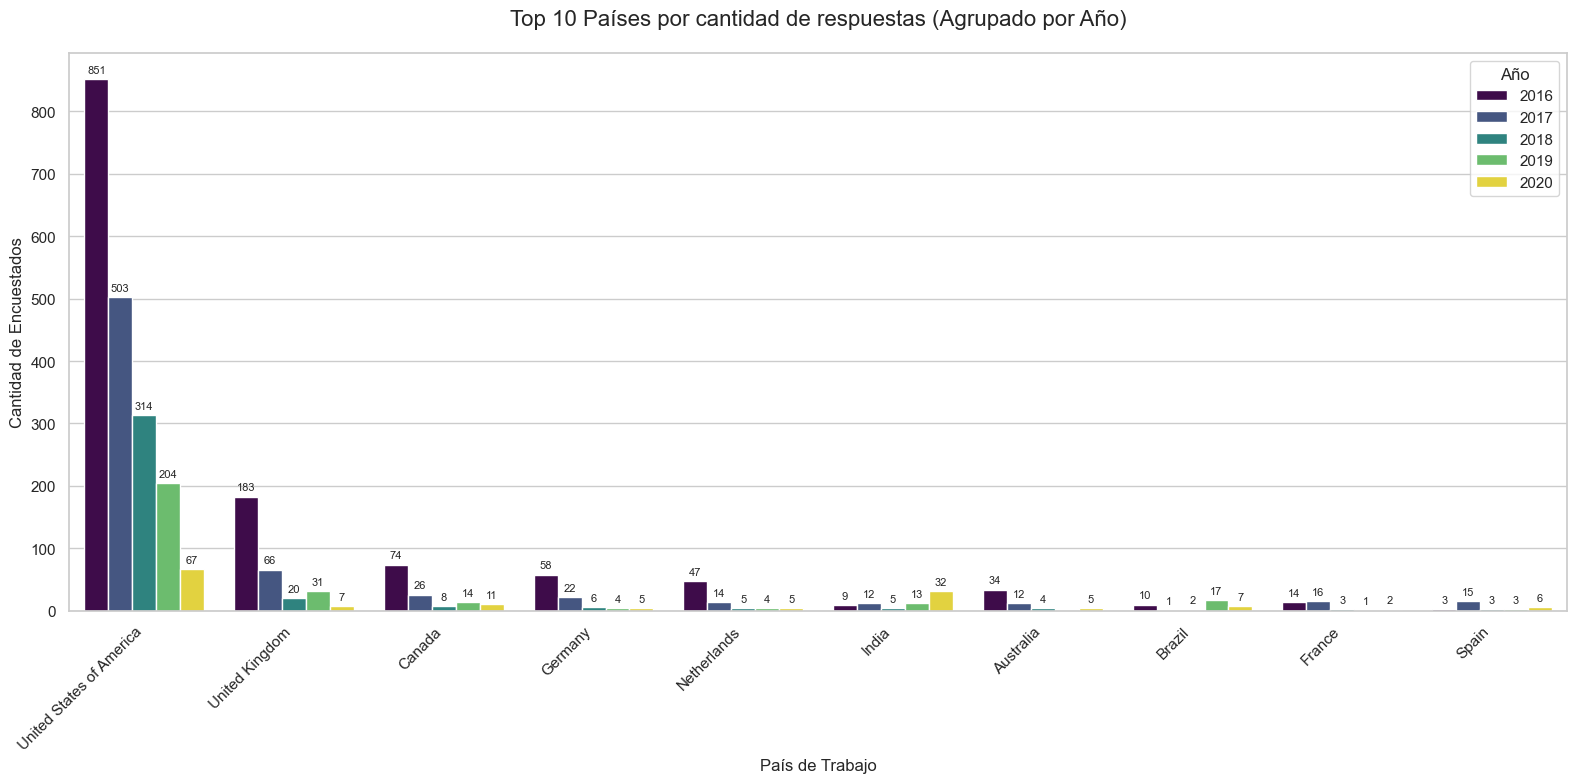

In [52]:
# Top 10 países con más encuestados (analizado por año)

sns.set_theme(style="whitegrid")
# Identificar los Top 10 países (sumando todos los años)
top_10_countries = df_encuesta_primera['work_country'].value_counts().nlargest(10).index
df_plot = df_encuesta_primera[df_encuesta_primera['work_country'].isin(top_10_countries)]

# Crear la gráfica
plt.figure(figsize=(16, 8))
ax = sns.countplot(
    data=df_plot,
    x='work_country',
    hue='year',              # agrupa las barras por año
    order=top_10_countries,  # ordenados de más a menos
    palette='viridis'
)
plt.title('Top 10 Países por cantidad de respuestas (Agrupado por Año)', fontsize=16, pad=20)
plt.xlabel('País de Trabajo', fontsize=12)
plt.ylabel('Cantidad de Encuestados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año', loc='upper right')
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=3)
plt.tight_layout()
plt.show()

In [55]:
# Analizamos la variable género
df_encuesta_primera['gender'].unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [56]:
# Reagrupamos el género al analizar el campo de texto libre
def limpiar_genero(genero):
    # Control de nulos y conversión a string minúscula
    if pd.isna(genero):
        return 'Other'
    
    g = str(genero).lower().strip()
    
    # Detectar explícitamente No Binarios / Queer
    nb_keywords = [
        'binary', 'queer', 'fluid', 'agender', 'contextual', 'unicorn', 
        'human', 'business', 'gender', 'enby', 'trans'
    ]    
    if any(k in g for k in nb_keywords):
        return 'Other'
    
    # Detectar FEMALE
    if 'fem' in g or 'woman' in g or 'girl' in g:
        return 'Female'
    # Casos cortos exactos
    if g in ['f', 'she/her']:
        return 'Female'

    # Detectar MALE
    if 'male' in g or 'man' in g or 'dude' in g or 'guy' in g or 'mail' in g or 'make' in g or 'malr' in g:
        return 'Male'
    # Casos cortos exactos
    if g in ['m', 'he/him', 'm|']:
        return 'Male'
        
    # El resto
    return 'Other'

# Aplicamos la función al dataset
df_encuesta_primera['gender_clean'] = df_encuesta_primera['gender'].apply(limpiar_genero)

# Verificamos los resultados
print("--- Conteo final de grupos ---")
print(df_encuesta_primera['gender_clean'].value_counts())

--- Conteo final de grupos ---
gender_clean
Male      2171
Female     839
Other      128
Name: count, dtype: int64


count    3136.000000
mean       34.609694
std         8.394999
min        18.000000
25%        29.000000
50%        33.000000
75%        39.000000
max        99.000000
Name: age, dtype: float64
count    3136.000000
mean       34.609694
std         8.394999
min        18.000000
25%        29.000000
50%        33.000000
75%        39.000000
max        99.000000
Name: age, dtype: float64


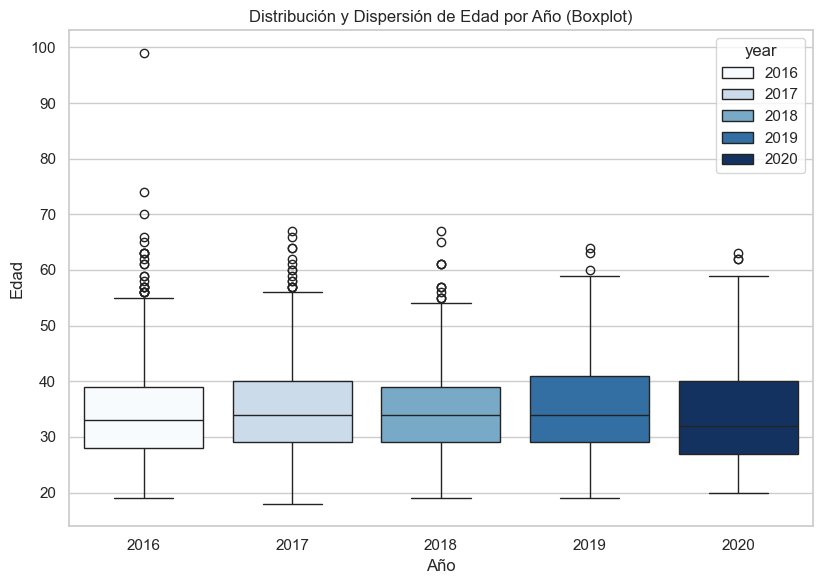

In [61]:
# Analizamos la variable de la edad
print(df_encuesta_primera['age'].describe())

# No tiene sentido edades inferiores a 18 años (no pueden trabajar), ni edades superiores a 99 años
mediana_edad = df_encuesta_primera['age'].median()
df_encuesta_primera.loc[df_encuesta_primera['age'] < 18, 'age'] = mediana_edad
df_encuesta_primera.loc[df_encuesta_primera['age'] > 99, 'age'] = mediana_edad
print(df_encuesta_primera['age'].describe())

# Gráfica con la varianza de 'age'
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_encuesta_primera, x='year', y='age', hue='year', palette='Blues')
plt.title('Distribución y Dispersión de Edad por Año (Boxplot)')
plt.ylabel('Edad')
plt.xlabel('Año')
plt.tight_layout()
plt.show()

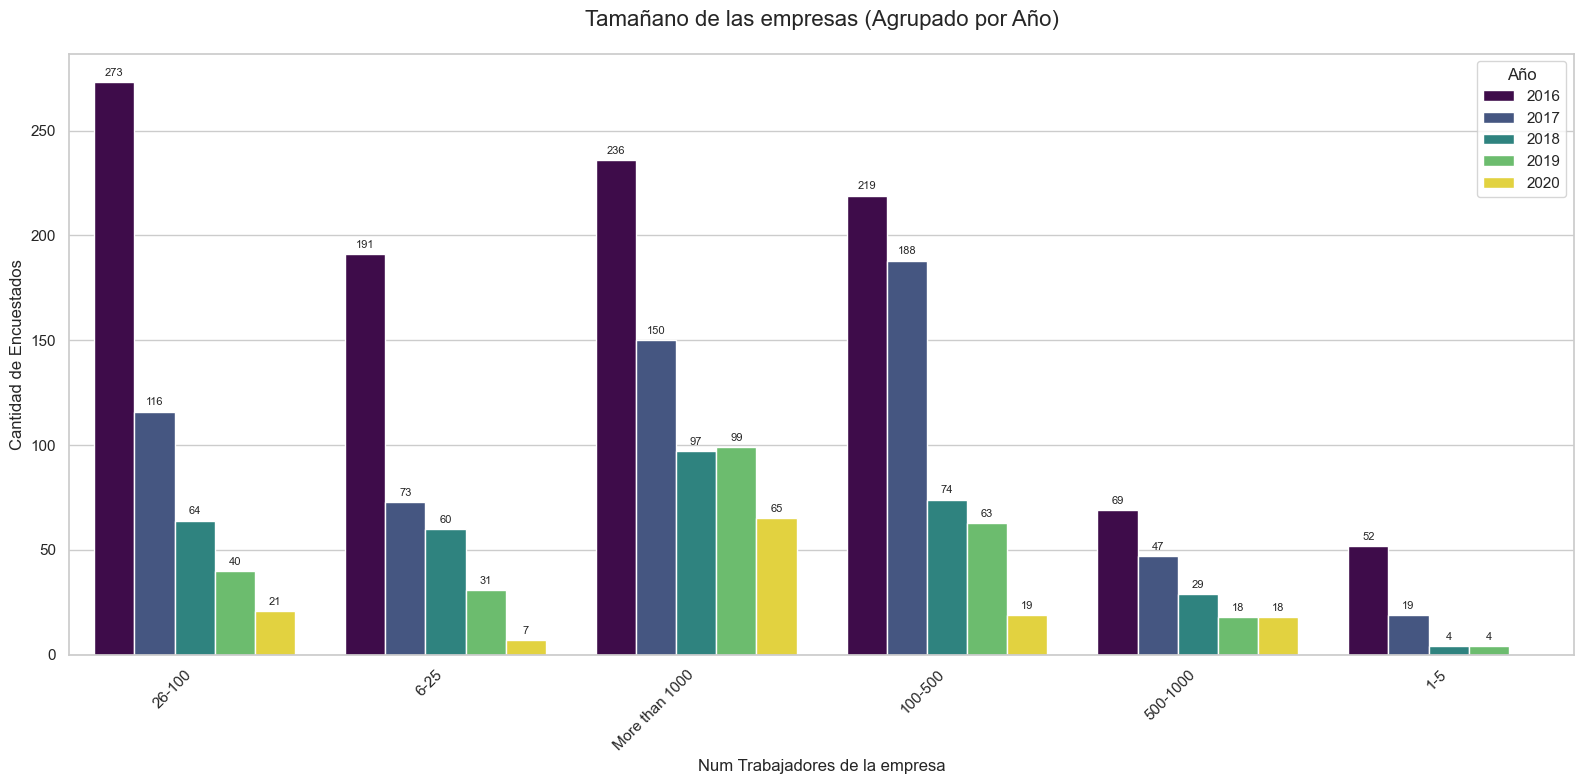

In [62]:
# Analizamos el tamaño de las empresas

sns.set_theme(style="whitegrid")
# Crear la gráfica
plt.figure(figsize=(16, 8))
ax = sns.countplot(
    data=df_plot,
    x='company_size',
    hue='year',              # agrupa las barras por año
    palette='viridis'
)
plt.title('Tamañano de las empresas (Agrupado por Año)', fontsize=16, pad=20)
plt.xlabel('Num Trabajadores de la empresa', fontsize=12)
plt.ylabel('Cantidad de Encuestados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año', loc='upper right')
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=3)
plt.tight_layout()
plt.show()

In [ ]:
# ANÁLISIS DE VARIABLES DE LA SEGUNDA ENCUESTA